<a href="https://colab.research.google.com/github/sakipatsu/Rabbit_Challenge/blob/main/4_1_tensorflow_codes_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensolFlow

## base

### constant

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder

In [3]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.64565102 0.01198155 0.08359059]
 [0.87925693 0.68180533 0.64233545]]
x: [[0.64565104 0.01198155 0.08359059]]
x: [[0.8792569 0.6818053 0.6423355]]


### variables

In [4]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_3:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 誤差 = 0.24998344
Generation: 20. 誤差 = 0.19221143
Generation: 30. 誤差 = 0.17137104
Generation: 40. 誤差 = 0.1547924
Generation: 50. 誤差 = 0.14155717
Generation: 60. 誤差 = 0.13099104
Generation: 70. 誤差 = 0.122555755
Generation: 80. 誤差 = 0.115821525
Generation: 90. 誤差 = 0.110445365
Generation: 100. 誤差 = 0.10615338
Generation: 110. 誤差 = 0.102726944
Generation: 120. 誤差 = 0.099991456
Generation: 130. 誤差 = 0.097807646
Generation: 140. 誤差 = 0.09606424
Generation: 150. 誤差 = 0.0946724
Generation: 160. 誤差 = 0.09356124
Generation: 170. 誤差 = 0.09267419
Generation: 180. 誤差 = 0.09196598
Generation: 190. 誤差 = 0.091400646
Generation: 200. 誤差 = 0.09094929
Generation: 210. 誤差 = 0.09058895
Generation: 220. 誤差 = 0.090301305
Generation: 230. 誤差 = 0.09007165
Generation: 240. 誤差 = 0.08988831
Generation: 250. 誤差 = 0.089741945
Generation: 260. 誤差 = 0.089625075
Generation: 270. 誤差 = 0.08953181
Generation: 280. 誤差 = 0.08945732
Generation: 290. 誤差 = 0.08939788
Generation: 300. 誤差 = 0.0893504
[3.0261905]


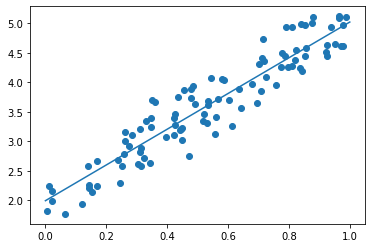

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2

# ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32, shape=[None,1])
dt = tf.placeholder(tf.float32, shape=[None,1])

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 非線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 29.753496
Generation: 200. 誤差 = 24.833534
Generation: 300. 誤差 = 20.57957
Generation: 400. 誤差 = 16.92988
Generation: 500. 誤差 = 13.824973
Generation: 600. 誤差 = 11.207633
Generation: 700. 誤差 = 9.023041
Generation: 800. 誤差 = 7.2189097
Generation: 900. 誤差 = 5.74576
Generation: 1000. 誤差 = 4.5571547
Generation: 1100. 誤差 = 3.6100035
Generation: 1200. 誤差 = 2.8648367
Generation: 1300. 誤差 = 2.2860649
Generation: 1400. 誤差 = 1.8421384
Generation: 1500. 誤差 = 1.5056363
Generation: 1600. 誤差 = 1.2532227
Generation: 1700. 誤差 = 1.0654718
Generation: 1800. 誤差 = 0.9265718
Generation: 1900. 誤差 = 0.8239567
Generation: 2000. 誤差 = 0.7478543
Generation: 2100. 誤差 = 0.6908264
Generation: 2200. 誤差 = 0.6473215
Generation: 2300. 誤差 = 0.61326754
Generation: 2400. 誤差 = 0.5857201
Generation: 2500. 誤差 = 0.5625803
Generation: 2600. 誤差 = 0.5423674
Generation: 2700. 誤差 = 0.5240517
Generation: 2800. 誤差 = 0.5069249
Generation: 2900. 誤差 = 0.4905119
Generation: 3000. 誤差 = 0.47449875
Generation: 3100. 誤差 =

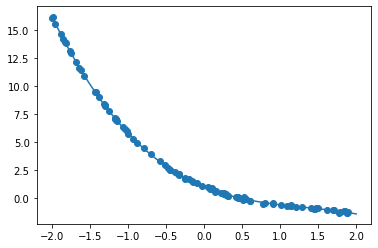

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 1000. 誤差 = 1101.0007
Generation: 2000. 誤差 = 359.52582
Generation: 3000. 誤差 = 151.3552
Generation: 4000. 誤差 = 73.31149
Generation: 5000. 誤差 = 25.985008
Generation: 6000. 誤差 = 5.1618037
Generation: 7000. 誤差 = 0.3843452
Generation: 8000. 誤差 = 0.0052758534
Generation: 9000. 誤差 = 4.0505156e-06
Generation: 10000. 誤差 = 8.115245e-09
Generation: 11000. 誤差 = 2.6801417e-09
Generation: 12000. 誤差 = 1.0604192e-09
Generation: 13000. 誤差 = 3.3061626e-10
Generation: 14000. 誤差 = 1.1643381e-10
Generation: 15000. 誤差 = 4.3192144e-11
Generation: 16000. 誤差 = 2.7694835e-08
Generation: 17000. 誤差 = 2.3915593e-11
Generation: 18000. 誤差 = 6.4571145e-07
Generation: 19000. 誤差 = 9.701957e-07
Generation: 20000. 誤差 = 1.2820842e-10
Generation: 21000. 誤差 = 1.6556332e-09
Generation: 22000. 誤差 = 5.4747384e-09
Generation: 23000. 誤差 = 3.4760407e-07
Generation: 24000. 誤差 = 1.8291743e-11
Generation: 25000. 誤差 = 2.7025111e-11
Generation: 26000. 誤差 = 2.842977e-09
Generation: 27000. 誤差 = 3.6317713e-09
Generation: 28000

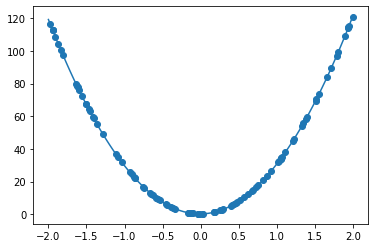

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 30000
plot_interval = 1000

input_layer_size = 3
output_layer_size = 1

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d = 30. * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
# noise = 0.05
# d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, input_layer_size])
dt = tf.placeholder(tf.float32, [None, output_layer_size])
W = tf.Variable(tf.random_normal([input_layer_size, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape([n, output_layer_size])
x_train = np.zeros([n, input_layer_size])
for i in range(n):
    for j in range(input_layer_size):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])    

# 予測関数
def predict(x):
    result = 0.
    for i in range(0,input_layer_size):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 分類1層 (mnist)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[False False False ... False False  True]
Generation: 1. 正解率 = 0.1698
[False False  True ... False False  True]
Generation: 2. 正解率 = 0.3082
[ True False  True ... False False  True]
Generation: 3. 正解率 = 0.3888
[ True False  True ... False False  True]
Generation: 4. 正解率 = 0.5411
[ True False  True ...  True False  True]
Generation: 5. 正解率 = 0.6059
[ True False  True ...  True False  True]
Generation: 6. 正解率 = 0.6646
[ True False  True ...  True False  True]
Generation: 7. 正解率 = 0.6828
[ True  True  True ...  True False  True]
Generation: 8. 正解

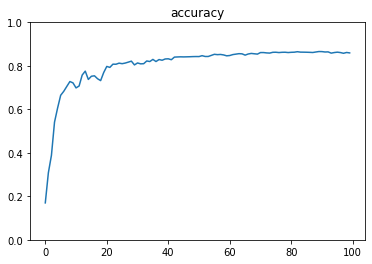

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

## 分類3層 (mnist)


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  隠れ層のサイズを変更してみよう
-  optimizerを変更しよう<br>

tf.train.GradientDescentOptimizer<br>
`__init__(
    learning_rate,
    use_locking=False,
    name='GradientDescent'
)`

tf.train.MomentumOptimizer<br>
`__init__(
    learning_rate,
    momentum,
    use_locking=False,
    name='Momentum',
    use_nesterov=False
)`

tf.train.AdagradOptimizer<br>
`__init__(
    learning_rate,
    initial_accumulator_value=0.1,
    use_locking=False,
    name='Adagrad'
)`

tf.train.RMSPropOptimizer<br>
`__init__(
    learning_rate,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-10,
    use_locking=False,
    centered=False,
    name='RMSProp'
)`

tf.train.AdamOptimizer<br>
`__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1398
Generation: 200. 正解率 = 0.3766
Generation: 300. 正解率 = 0.3617
Generation: 400. 正解率 = 0.491
Generation: 500. 正解率 = 0.6137
Generation: 600. 正解率 = 0.6708
Generation: 700. 正解率 = 0.704
Generation: 800. 正解率 = 0.7518
Generation: 900. 正解率 = 0.778
Generation: 1000. 正解率 = 0.7987
Generation: 1100. 正解率 = 0.8184
Generation: 1200. 正解率 = 0.8315
Generation: 1300. 正解率 = 0.8435
Generation: 1400. 正解率 = 0.8549
Generation: 1500. 正解率 = 0.8602
Generation: 1600. 正解率 = 0.8662
Generation: 1700. 正解率 = 0.8719
Generation: 1800. 正解率 = 0.8778
Generation: 1900. 正解率 = 0.8802
Generation: 2000. 正解率 = 0.8829
Generation: 2100. 正解率 = 0.8866
Generation: 2200. 正解率 = 0.8888
Generation: 2300. 正解率 = 0.8917
Generation: 2400. 正解率 = 0.8937
Generation: 2500. 正解率 = 0.896
Generation: 2600. 正解率 = 0.8985
Generation: 2

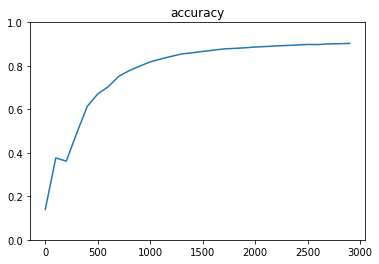

In [9]:
import tensorflow as tf
import numpy as np

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## 分類CNN (mnist)
conv - relu - pool - conv - relu - pool - <br>
affin - relu - dropout - affin - softmax<br>

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  ドロップアウト率を0に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.28
Generation: 20. 正解率 = 0.45
Generation: 30. 正解率 = 0.59
Generation: 40. 正解率 = 0.64
Generation: 50. 正解率 = 0.81
Generation: 60. 正解率 = 0.81
Generation: 70. 正解率 = 0.82
Generation: 80. 正解率 = 0.83
Generation: 90. 正解率 = 0.82
Generation: 100. 正解率 = 0.86
Generation: 110. 正解率 = 0.86
Generation: 120. 正解率 = 0.86
Generation: 130. 正解率 = 0.83
Generation: 140. 正解率 = 0.9
Generation: 150. 正解率 = 0.85
Generation: 160. 正解率 = 0.91
Generation: 170. 正解率 = 0.95
Generation: 180. 正解率 = 0.9
Generation: 190. 正解率 = 0.89
Generation: 200. 正解率 = 0.93
Generation: 210. 正解率 = 0.92
Generation: 220. 正解率 = 0.93
Generation: 230. 正解率 = 0.94
Generation: 240. 正解率 = 0.94
Generation: 250. 正解率 = 0.89
Generation: 260. 正解率 = 0.89
Generation: 270. 正解率 = 0.97
Generation: 280. 正解率 = 0.9
Generation: 290. 正解率 = 0.9
Generat

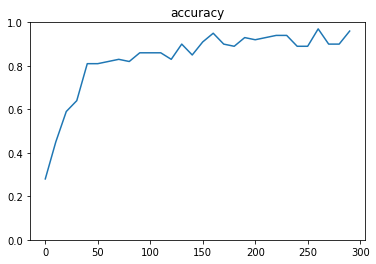

In [10]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.5

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                